# Building a handwritten digit recognizer using Neural Networks and the Keras library

A database of images of handwritten digits from [MNIST](http://yann.lecun.com/exdb/mnist/) is used.  This example code is from [Handwritten Digit Recognition using Convolutional Neural Networks in Python with Keras](http://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/)

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

Using TensorFlow backend.


Load image dataset

In [2]:
seed = 7
numpy.random.seed(seed)

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

Let's see what the data looks like

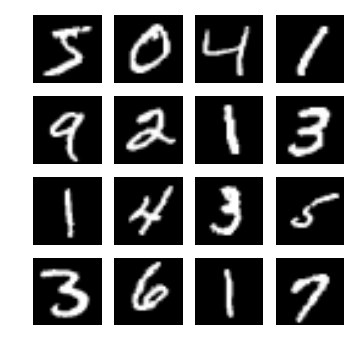

In [5]:
samples = [(i,X_train[i]) for i in range(16)]
plt.figure(figsize=(4,4))
for (i,img) in samples:
    plt.subplot(4,4,i+1)
    plt.axis("off")
    plt.imshow(img, cmap = 'gray')
plt.axis("off")
plt.show()

In [6]:
y_train.shape
for i in range(16):
    print(y_train[i])

5
0
4
1
9
2
1
3
1
4
3
5
3
6
1
7


## Simple Neural Network Model

Flatten 28*28 images to a 784 vector for each image

In [7]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [8]:
X_train.shape

(60000, 784)

Normalize inputs from 0-255 to 0.0-1.0

In [9]:
X_train = X_train / 255
X_test = X_test / 255

Outputs we want are 0-9 according to the correct digit.  But this isn't the best output for the network.  A vector of binary values is the usual way.  So encode output this way as "categorical" values, i.e. a vector of 0 or 1's, whose length is the same as the number of possible output values.

In [10]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [11]:
y_train[0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

Define a simple neural network model.

In [14]:
def baseline_model():
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, init='normal', activation='relu'))
    model.add(Dense(num_classes, init='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

Build the model and train it on the training data

In [15]:
model = baseline_model()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=10, batch_size=200, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
5s - loss: 0.2835 - acc: 0.9190 - val_loss: 0.1396 - val_acc: 0.9589
Epoch 2/10
4s - loss: 0.1122 - acc: 0.9672 - val_loss: 0.0931 - val_acc: 0.9721
Epoch 3/10
4s - loss: 0.0725 - acc: 0.9791 - val_loss: 0.0790 - val_acc: 0.9762
Epoch 4/10
4s - loss: 0.0511 - acc: 0.9856 - val_loss: 0.0729 - val_acc: 0.9775
Epoch 5/10
5s - loss: 0.0377 - acc: 0.9896 - val_loss: 0.0681 - val_acc: 0.9788
Epoch 6/10
4s - loss: 0.0270 - acc: 0.9928 - val_loss: 0.0654 - val_acc: 0.9797
Epoch 7/10
5s - loss: 0.0209 - acc: 0.9947 - val_loss: 0.0581 - val_acc: 0.9818
Epoch 8/10
4s - loss: 0.0136 - acc: 0.9971 - val_loss: 0.0594 - val_acc: 0.9814
Epoch 9/10
4s - loss: 0.0109 - acc: 0.9977 - val_loss: 0.0542 - val_acc: 0.9826
Epoch 10/10
4s - loss: 0.0082 - acc: 0.9986 - val_loss: 0.0563 - val_acc: 0.9824


How did it do?

In [16]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 1.76%


## Visualize the training

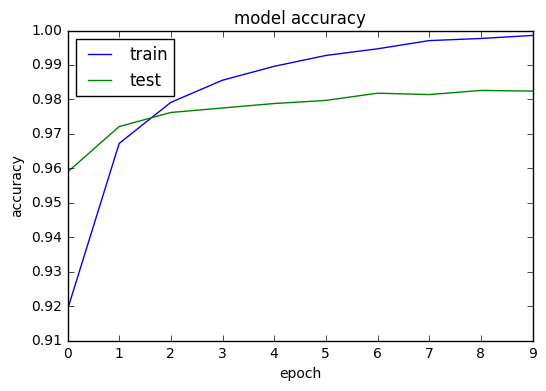

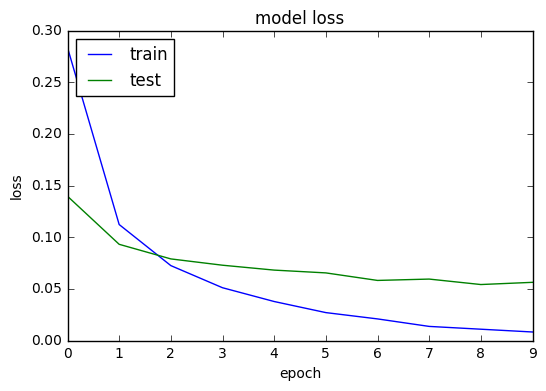

In [17]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## How robust is the recognizer?
### Rotate the images

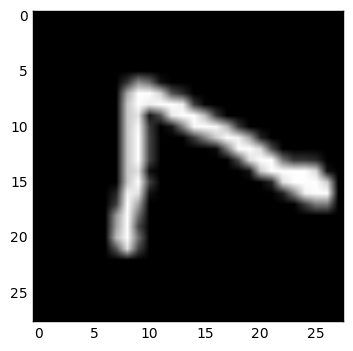

[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


In [18]:
plt.imshow(numpy.rot90(X_test[0].reshape(28,28)),cmap = "gray")
plt.show()
print(y_test[0])

How well does it do if we rotate the images 90 degrees?

In [22]:
X_test_rotated = numpy.copy(X_test).reshape(10000,28,28)

for i in range(10000):
    X_test_rotated[i] = numpy.rot90(X_test_rotated[i])

X_test_rotated = X_test_rotated.reshape(10000,28*28)

scores = model.evaluate(X_test_rotated, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 88.28%


### Translate the images

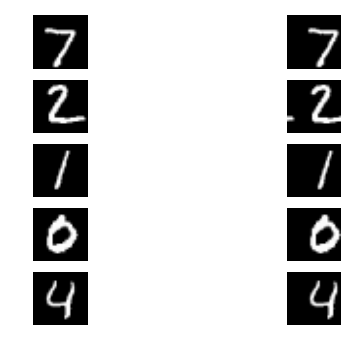

In [32]:
for i in range(5):
    plt.subplot(5,2,2*i+1)
    plt.imshow(X_test[i].reshape(28,28),cmap = "gray")
    plt.axis("off")
    #plt.title("Original")
    plt.subplot(5,2,2*i+2)
    plt.imshow(numpy.roll(X_test[i].reshape(28,28),5,axis=1),cmap = "gray")
    plt.axis("off")
    #plt.title("Translated")
plt.axis("off")
plt.show()

In [33]:
shift_pixels = 0
X_test_shifted = numpy.copy(X_test).reshape(10000,28,28)

for i in range(10000):
    X_test_shifted[i] = numpy.roll(X_test_shifted[i],shift_pixels,axis=1)

X_test_shifted = X_test_shifted.reshape(10000,28*28)

scores = model.evaluate(X_test_shifted, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 76.06%


## CNN Model

CNN model from mnist_cnn.py in Keras samples

Input to CNN layers needs a 3D shape, so just redo the input prep here

In [73]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

batch_size = 128
nb_classes = 10
nb_epoch = 2

# input image dimensions
img_rows, img_cols = 28, 28
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

if K.image_dim_ordering() == 'th':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

model = Sequential()

model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [74]:
input_shape

(28, 28, 1)

In [75]:
X_train.shape

(60000, 28, 28, 1)

In [76]:
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
          verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 97s - loss: 0.3972 - acc: 0.8779 - val_loss: 0.0958 - val_acc: 0.9716
Epoch 2/2
60000/60000 [==============================] - 96s - loss: 0.1447 - acc: 0.9579 - val_loss: 0.0607 - val_acc: 0.9797
Test score: 0.0607133566635
Test accuracy: 0.9797


In [77]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.0607133566635
Test accuracy: 0.9797


In [41]:
# serialize model to disk in JSON format
model_json = model.to_json()
with open("cnn_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("cnn_model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# load from disk and create model
json_file = open('cnn_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("cnn_model.h5")
print("Loaded model from disk")

# compile
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

### Test with translated images

In [49]:
X_test.shape

(10000, 28, 28, 1)

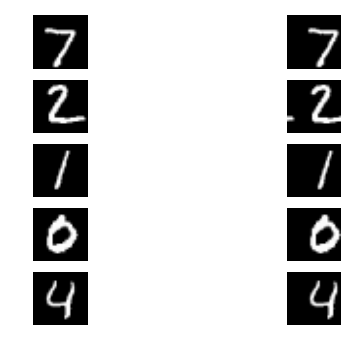

In [46]:
for i in range(5):
    plt.subplot(5,2,2*i+1)
    plt.imshow(X_test[i].reshape(28,28),cmap = "gray")
    plt.axis("off")
    #plt.title("Original")
    plt.subplot(5,2,2*i+2)
    plt.imshow(numpy.roll(X_test[i],5,axis=1).reshape(28,28),cmap = "gray")
    plt.axis("off")
    #plt.title("Translated")
plt.axis("off")
plt.show()

In [95]:
shift_pixels = 0
X_test_shifted = numpy.copy(X_test)

for i in range(10000):
    X_test_shifted[i] = numpy.roll(X_test_shifted[i],shift_pixels,axis=1)

In [96]:
score = model.evaluate(X_test_shifted, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
print("Baseline Error: %.2f%%" % (100-score[1]*100))

Test score: 0.0607133566635
Test accuracy: 0.9797
Baseline Error: 2.03%


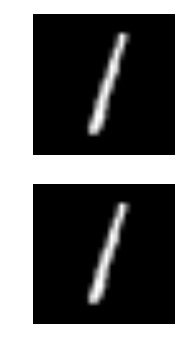

In [97]:
index = 2
plt.subplot(2,1,1)
plt.imshow(X_test[index].reshape(28,28),cmap = "gray")
plt.axis("off")
plt.subplot(2,1,2)
plt.imshow(X_test_shifted[index].reshape(28,28),cmap = "gray")
plt.axis("off")
plt.show()